<a href="https://colab.research.google.com/github/Cyber-Squid1/PyTorch/blob/main/LinearRegression_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

 Training Pipeline

 Step 1: Design Model(input_size,output_size,forward_pass)

 Step 2: Construct Loss and Optimizer

 Step 3: Training Loop (

         - forward pass: compute prediction
         - backward pass/propogation: gradients
         - update weights
 )

epoch: 10, loss=5038.0537
epoch: 20, loss=3692.3691
epoch: 30, loss=2740.8435
epoch: 40, loss=2066.4878
epoch: 50, loss=1587.5303
epoch: 60, loss=1246.6592
epoch: 70, loss=1003.5969
epoch: 80, loss=829.9683
epoch: 90, loss=705.7310
epoch: 100, loss=616.6965


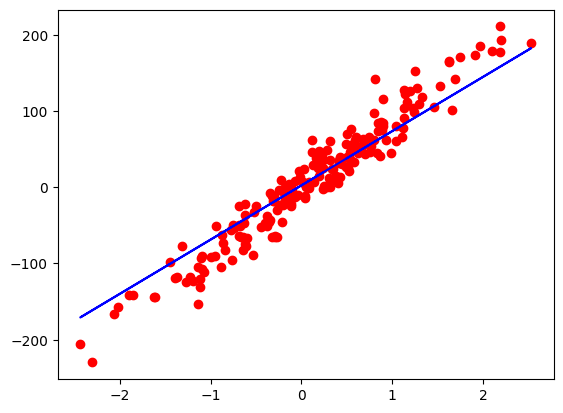

In [ ]:
x_numpy,y_numpy=datasets.make_regression(n_samples=200,n_features=1,noise=20,random_state=1)

x=torch.from_numpy(x_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))

y=y.view(y.shape[0],1) # reshape row tensor to column tensor

n_samples,n_features=x.shape
input_size=n_features
output_size=1

model=nn.Linear(input_size,output_size)

# Setting up loss and optimizer functions
lr=0.01
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=lr)

# Training loop
n_epoch=100

for epoch in range(n_epoch):
    # Forward pass and loss calculation
    y_pred=model(x)
    loss=criterion(y_pred,y)

    # backward pass
    loss.backward()

    # update weight
    optimizer.step()

    # zero gradients
    optimizer.zero_grad()

    if(epoch+1)%10 == 0:
        print(f'epoch: {epoch+1}, loss={loss.item():.4f}')

# ploting
predictions=model(x).detach().numpy()
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predictions,'b')
plt.show()